In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dfr = pd.read_excel(r'/content/drive/My Drive/NVDA.xlsx')

In [ ]:
df=dfr.copy()

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])


In [ ]:
full_date_range = pd.date_range(start=df['Date'].min(), end=df['Date'].max(), freq='D')
df.set_index('Date', inplace=True)
df = df.reindex(full_date_range)

df.reset_index(inplace=True)
df.rename(columns={'index': 'Date'}, inplace=True)

In [ ]:
for i in df.columns[1:]:
  df[i] = df[i].interpolate()

In [ ]:
df.set_index('Date', inplace=True)

In [ ]:
df.describe()


,Open,High,Low,Close,Adj Close,Volume
count,1828.000000,1828.000000,1828.000000,1828.000000,1828.000000,1.828000e+03
mean,29.139342,29.701165,28.560986,29.163804,29.141780,4.526540e+08
std,28.448584,29.006821,27.827771,28.444060,28.450982,1.819792e+08
min,4.014500,4.083500,3.975000,4.030500,4.011333,8.919675e+07
25%,12.883437,13.112500,12.707250,12.928625,12.898245,3.206995e+08
50%,18.420624,18.949376,18.084249,18.581917,18.554703,4.273730e+08
75%,32.773833,33.367750,31.900417,32.674500,32.621290,5.511105e+08
max,139.800003,140.759995,132.419998,135.580002,135.580002,1.543911e+09


In [ ]:
fig = go.Figure()

for i in df.columns:
  fig.add_trace(go.Scatter(x=df.index, y=df[i], mode='lines', name=str(i)))

fig.update_layout(
    title='NVDA Stock',
    xaxis_title='Date',
    yaxis_title='Number of Shares',
    updatemenus=[
        {
            'buttons': [
                {
                    'label': 'Show All',
                    'method': 'update',
                    'args': [{'visible': [True, True]}]
                },
                {
                    'label': 'Series1 Only',
                    'method': 'update',
                    'args': [{'visible': [True, False]}]
                },
                {
                    'label': 'Series2 Only',
                    'method': 'update',
                    'args': [{'visible': [False, True]}]
                }
            ],
            'direction': 'down',
            'showactive': True
        }
    ]
)

# Show figure
fig.show()

In [ ]:
fig = go.Figure(data=[go.Candlestick(x=df.index,
                                     open=df['Open'],
                                     high=df['High'],
                                     low=df['Low'],
                                     close=df['Close'])])

# Update the layout for better visualization
fig.update_layout(title='NVIDIA Stock Candlestick Chart',
                  xaxis_title='Date',
                  yaxis_title='Price',
                  xaxis_rangeslider_visible=False)

# Show the chart
fig.show()

In [ ]:
correlation_matrix = df[['Close', 'Volume']].corr()
correlation_matrix

,Close,Volume
Close,1.00000,-0.02626
Volume,-0.02626,1.00000


**Volatility**

In [ ]:
df['Daily_Return'] = df['Close'].pct_change()
df['Volatility_30'] = df['Daily_Return'].rolling(window=30).std()
df['Volatility_90'] = df['Daily_Return'].rolling(window=90).std()
fig = go.Figure()

fig.add_trace(go.Scatter(x=df.index, y=df['Volatility_30'], mode='lines', name='30-Day Rolling Volatility', line=dict(color='blue')))
fig.add_trace(go.Scatter(x=df.index, y=df['Volatility_90'], mode='lines', name='90-Day Rolling Volatility', line=dict(color='red')))

fig.update_layout(
    title='NVIDIA Volatility Over Time',
    xaxis_title='Date',
    yaxis_title='Volatility',
)

fig.show()

In [ ]:
df['Daily_Return'] = df['Close'].pct_change()

fig = go.Figure()

fig.add_trace(go.Scatter(x=df.index, y=df['Daily_Return'], mode='lines', name='Daily Return', line=dict(color='red')))

fig.update_layout(
    title='Daily Return Over Time',
    xaxis_title='Date',
    yaxis_title='%Change',
)

fig.show()

# **Seasonal Decomposition**

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
cl = df['Close']

In [ ]:
result = seasonal_decompose(cl, model='additive', period=90)

trend = result.trend
seasonal = result.seasonal
residual = result.resid

In [ ]:

# Create traces for Plotly
trace_close = go.Scatter(x=df.index, y=cl, mode='lines', name='Close Price')
trace_trend = go.Scatter(x=df.index, y=trend, mode='lines', name='Trend')
trace_seasonal = go.Scatter(x=df.index, y=seasonal, mode='lines', name='Seasonal')
trace_residual = go.Scatter(x=df.index, y=residual, mode='lines', name='Residual')

# Create figure and add traces
fig = go.Figure()
fig.add_trace(trace_close)
fig.add_trace(trace_trend)
fig.add_trace(trace_seasonal)
fig.add_trace(trace_residual)

# Update layout for better visualization
fig.update_layout(title='Quaterly Seasonal Decomposition of Close Price',
                  xaxis_title='Date',
                  yaxis_title='Price')

# Show the plot
fig.show()


# **Moving Averages**

In [ ]:
window_30 = 30
moving_avg_30 = cl.rolling(window=window_30).mean()

window_90 = 90
moving_avg_90 = cl.rolling(window=window_90).mean()

window_120 = 120
moving_avg_120 = cl.rolling(window=window_120).mean()

window_365 = 365
moving_avg_365 = cl.rolling(window=window_365).mean()

In [ ]:
trace_close = go.Scatter(x=df.index, y=cl, mode='lines', name='Close Price')
trace_moving_avg_30 = go.Scatter(x=df.index, y=moving_avg_30, mode='lines', name=f'Monthly Moving Average')
trace_moving_avg_90 = go.Scatter(x=df.index, y=moving_avg_90, mode='lines', name=f'Quaterly Moving Average')
trace_moving_avg_120 = go.Scatter(x=df.index, y=moving_avg_120, mode='lines', name=f'Half-Yearly Moving Average')
trace_moving_avg_365= go.Scatter(x=df.index, y=moving_avg_365, mode='lines', name=f'Yearly Moving Average')


fig = go.Figure()
fig.add_trace(trace_close)
fig.add_trace(trace_moving_avg_30)
fig.add_trace(trace_moving_avg_90)
fig.add_trace(trace_moving_avg_120)
fig.add_trace(trace_moving_avg_365)

fig.update_layout(title='Moving Averages of Close Price',
                  xaxis_title='Date',
                  yaxis_title='Price')

fig.show()

# **Dickey Fuller Test**

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
close = df['Close']
dicftest = adfuller(close)

In [ ]:
print('ADF Statistic:', dicftest[0])
print('p-value:', dicftest[1])
print('Critical Values:', dicftest[4])
if dicftest[1] <= 0.05:
    print("Reject the null hypothesis - Data is stationary.")
else:
    print("Fail to reject the null hypothesis - Data is non-stationary.")

ADF Statistic: 1.9910438513759796
p-value: 0.9986612000318194
Critical Values: {'1%': -3.433972018026501, '5%': -2.8631399192826676, '10%': -2.5676217442756872}
Fail to reject the null hypothesis - Data is non-stationary.


**Differencing**

In [ ]:
differenced_close = close.diff().dropna()
diff_dicftest = adfuller(differenced_close)

In [ ]:
print('ADF Statistic:', diff_dicftest[0])
print('p-value:', diff_dicftest[1])
print('Critical Values:', diff_dicftest[4])
if diff_dicftest[1] <= 0.05:
    print("Reject the null hypothesis - Data is stationary.")
else:
    print("Fail to reject the null hypothesis - Data is non-stationary.")

ADF Statistic: -8.36726123345569
p-value: 2.7217101954049454e-13
Critical Values: {'1%': -3.433972018026501, '5%': -2.8631399192826676, '10%': -2.5676217442756872}
Reject the null hypothesis - Data is stationary.


In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=differenced_close.index,
    y=differenced_close.values,
    mode='lines',
    name='Differenced Close Prices'
))

# Update layout
fig.update_layout(
    title="Differenced Close Prices",
    xaxis_title="Date",
    yaxis_title="Differenced Close Price",
)

# Show the plot
fig.show()

# **Autocorrelation Test and Partial Autocorrelation Test**

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
close = df['Close']
diff_close = df['Close'].diff().dropna()

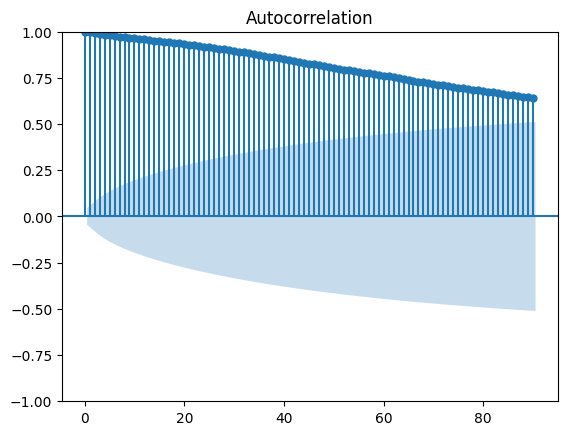

In [ ]:
fig_acf, ax_acf = plt.subplots()
plot_acf(close, lags=90, ax=ax_acf)
plt.show()

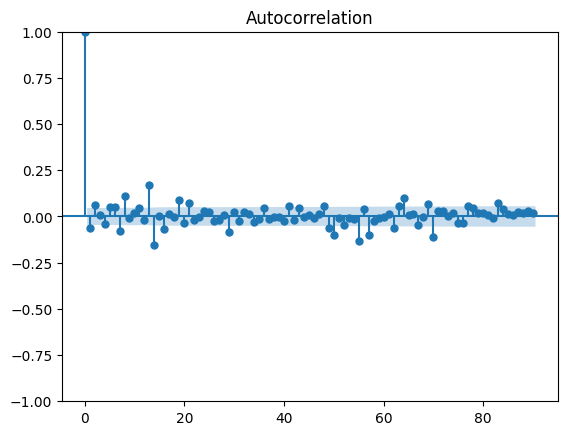

In [ ]:
fig_acf, ax_acf = plt.subplots()
plot_acf(diff_close, lags=90, ax=ax_acf)
plt.show()

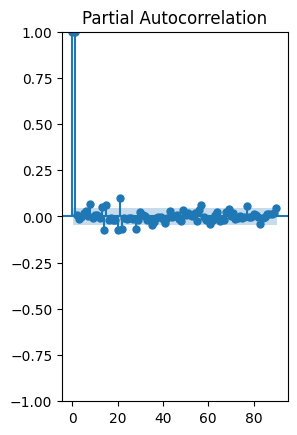

In [ ]:
plt.subplot(1, 2, 2)
plot_pacf(close, lags=90, ax=plt.gca())
plt.show()

In [ ]:
df['Close_diff'] = df['Close'].diff()

fig = go.Figure()

fig.add_trace(go.Scatter(x=df.index, y=df['Close_diff'], mode='lines', name='Close', line=dict(color='red')))
fig.add_trace(go.Scatter(x=df.index, y=df['Close'], mode='lines', name='Close Stationary', line=dict(color='blue')))

fig.update_layout(
    title='Close Price',
    xaxis_title='Date',
    yaxis_title='Price',
)

fig.show()